In [ ]:
import pandas as pd

In [ ]:
weather = pd.read_csv("local_weather.csv", index_col="time")
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,9.4,6.0,15.1,0.0
02-01-1990,9.3,5.2,14.2,0.0
03-01-1990,9.0,6.5,13.6,0.0
04-01-1990,10.7,6.0,17.5,0.0
05-01-1990,12.6,7.3,20.8,0.0
...,...,...,...,...
21-07-2022,28.6,26.8,30.6,21.2
22-07-2022,29.3,27.0,32.9,0.3
23-07-2022,30.1,25.5,34.9,8.9


In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.007903
tmin    0.129141
tmax    0.044813
prcp    0.516227
dtype: float64

In [ ]:
weather["prcp"] = weather["prcp"].fillna(0)
weather = weather.fillna(method="ffill")

In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [ ]:
weather.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [ ]:
weather.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [ ]:
weather.index = pd.to_datetime(weather.index)

<ipython-input-12-a057e07b9bbc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather.index = pd.to_datetime(weather.index)


In [ ]:
weather.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11894, freq=None)

<Axes: xlabel='time'>

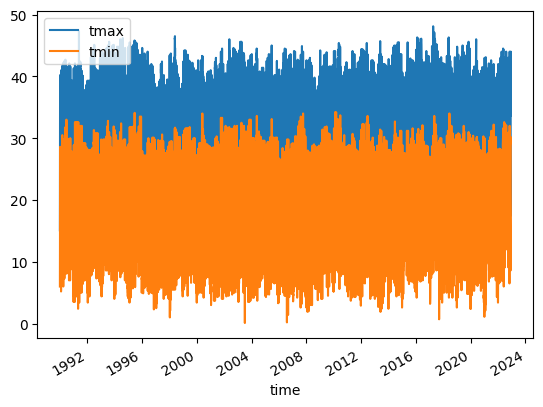

In [ ]:
weather[["tmax", "tmin"]].plot()

<Axes: xlabel='time'>

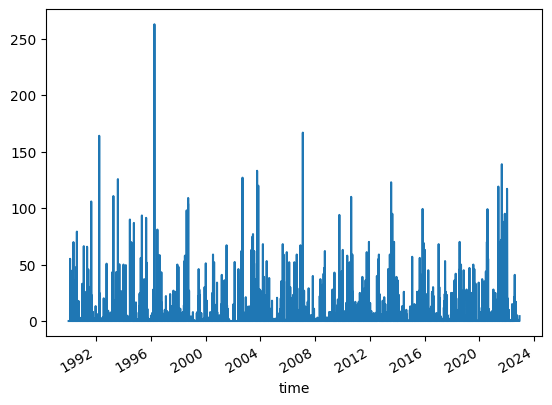

In [ ]:
weather["prcp"].plot()

In [ ]:
weather["target"] = weather.shift(-1)["tmax"]


In [ ]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,9.4,6.0,15.1,0.0,14.2
1990-02-01,9.3,5.2,14.2,0.0,13.6
1990-03-01,9.0,6.5,13.6,0.0,17.5
1990-04-01,10.7,6.0,17.5,0.0,20.8
1990-05-01,12.6,7.3,20.8,0.0,22.9
...,...,...,...,...,...
2022-07-21,28.6,26.8,30.6,21.2,32.9
2022-07-22,29.3,27.0,32.9,0.3,34.9
2022-07-23,30.1,25.5,34.9,8.9,35.7


In [ ]:
weather = weather.iloc[:-1,:].copy()

In [ ]:
weather

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,9.4,6.0,15.1,0.0,14.2
1990-02-01,9.3,5.2,14.2,0.0,13.6
1990-03-01,9.0,6.5,13.6,0.0,17.5
1990-04-01,10.7,6.0,17.5,0.0,20.8
1990-05-01,12.6,7.3,20.8,0.0,22.9
...,...,...,...,...,...
2022-07-20,30.1,26.5,33.2,14.7,30.6
2022-07-21,28.6,26.8,30.6,21.2,32.9
2022-07-22,29.3,27.0,32.9,0.3,34.9


In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [ ]:
predictors = ["prcp", "tmax", "tmin"]

In [ ]:
train = weather.loc[:"2020-12-31"]
test = weather.loc["2021-01-01":]

In [ ]:
train

,tavg,tmin,tmax,prcp,target
time,,,,,
1990-01-01,9.4,6.0,15.1,0.0,14.2
1990-02-01,9.3,5.2,14.2,0.0,13.6
1990-03-01,9.0,6.5,13.6,0.0,17.5
1990-04-01,10.7,6.0,17.5,0.0,20.8
1990-05-01,12.6,7.3,20.8,0.0,22.9
...,...,...,...,...,...
2020-12-27,15.0,6.0,21.9,0.0,22.6
2020-12-28,11.8,5.6,22.6,0.0,20.9
2020-12-29,10.8,3.6,20.9,0.0,18.1


In [ ]:
test

,tavg,tmin,tmax,prcp,target
time,,,,,
2021-01-01,10.4,1.1,18.4,0.0,19.2
2021-02-01,12.4,7.0,19.2,0.5,19.5
2021-03-01,13.3,9.9,19.5,24.9,22.4
2021-04-01,16.8,11.4,22.4,15.0,22.6
2021-05-01,17.7,13.2,22.6,5.1,20.8
...,...,...,...,...,...
2022-07-20,30.1,26.5,33.2,14.7,30.6
2022-07-21,28.6,26.8,30.6,21.2,32.9
2022-07-22,29.3,27.0,32.9,0.3,34.9


In [ ]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

2.889859802933307

In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [ ]:
combined

,actual,predictions
time,,
2021-01-01,19.2,18.637096
2021-02-01,19.5,19.713956
2021-03-01,22.4,20.420926
2021-04-01,22.6,23.015244
2021-05-01,20.8,23.195190
...,...,...
2022-07-20,30.6,33.638610
2022-07-21,32.9,31.384729
2022-07-22,34.9,33.242110


<Axes: xlabel='time'>

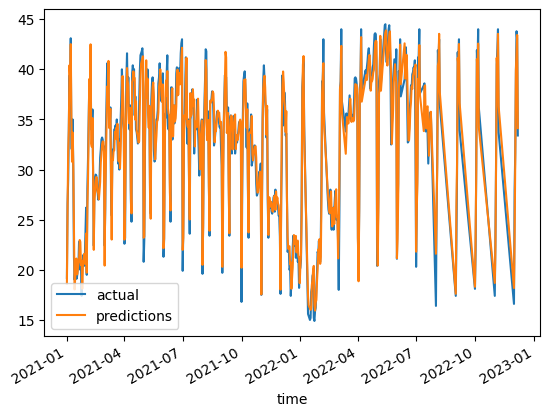

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([0.01083208, 0.90081784, 0.05945583])

In [ ]:
def create_predictions(predictors,weather,reg):
  train = weather.loc[:"2020-12-31"]
  test = weather.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_squared_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error,combined

In [ ]:
weather["month_day_max"] = weather["tavg"] / weather["tmax"]

weather["max_min"] = weather["tmax"] / weather["tmin"]

In [ ]:
predictors = ["prcp", "tmax", "tmin", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, weather, reg)
error

2.5638100745856893

In [44]:
combined.plot()

SyntaxError: ignored

In [45]:
combined

,actual,predictions
time,,
2021-01-01,19.2,18.314273
2021-02-01,19.5,19.450843
2021-03-01,22.4,19.951499
2021-04-01,22.6,23.410767
2021-05-01,20.8,23.728848
...,...,...
2022-07-20,30.6,33.931081
2022-07-21,32.9,31.732538
2022-07-22,34.9,33.278048


In [50]:
weekpredict = combined.iloc[:30]

In [48]:
weekpredict

,actual,predictions
time,,
2021-01-01,19.2,18.314273
2021-02-01,19.5,19.450843
2021-03-01,22.4,19.951499
2021-04-01,22.6,23.410767
2021-05-01,20.8,23.728848
2021-06-01,21.3,22.801098
2021-07-01,19.9,21.854057


<Axes: xlabel='time'>

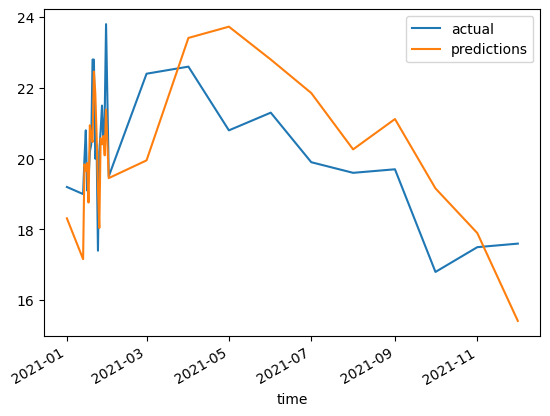

In [51]:
weekpredict.plot()